# Linear Regression Machine Learning Project for House Price Prediction

### Import Libraries

In [1]:
#objective of our program is to predict the house price
#import all lib-----
#load the data-----
#data analysis------
#Data preprocessing---------
#split data into train test split (train,test)#
#selet algorithm
#train your model
#test your model
#check accuracy (80%)
#prediction/classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import mysql.connector

%matplotlib inline

In [3]:
#Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.

#NumPy is an open-source numerical Python library. NumPy contains a multi-dimensional array and matrix data structures

#pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming lang

# connecting with Mysql using xammp

In [4]:
my_db=mysql.connector.connect(host="localhost",user="root",password="",database="house_data")
print('you are connected to database now',my_db)
mycursor=my_db.cursor()
S=(" SELECT * from house_data_baldau")
mycursor.execute(S)

you are connected to database now <mysql.connector.connection.MySQLConnection object at 0x0000006A9154D288>


In [5]:
result=mycursor.fetchall()
for rec in result:
    print(rec)
   

('location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price')
('Electronic City Phase II', '2', 'Coomee ', '1056', '2', '1', '39.07')
('Chikka Tirupathi', '4', 'Theanmp', '2600', '5', '3', '120')
('Uttarahalli', '3', '', '1440', '2', '3', '62')
('Lingadheeranahalli', '3', 'Soiewre', '1521', '3', '1', '95')
('Kothanur', '2', '', '1200', '2', '1', '51')
('Whitefield', '2', 'DuenaTa', '1170', '2', '1', '38')
('Old Airport Road', '4', 'Jaades ', '2732', '4', '1', '204')
('Rajaji Nagar', '4', 'Brway G', '3300', '4', '1', '600')
('Marathahalli', '3', '', '1310', '3', '1', '63.25')
('Gandhi Bazar', '6', '', '1020', '6', '1', '370')
('Whitefield', '3', '', '1800', '2', '2', '70')
('Gandhi Bazar', '6', '', '1020', '6', '1', '370')
('7th Phase JP Nagar', '2', 'Shncyes', '1000', '2', '1', '38')
('Gottigere', '2', '', '1100', '2', '2', '40')
('Gandhi Bazar', '6', '', '1020', '6', '1', '370')
('Mysore Road', '2', 'PrntaEn', '1175', '2', '2', '73.5')
('Bisuvanahalli', '3', 'Prityel', '11

### Importing Data and Checking out.

In [6]:
HouseDF = pd.DataFrame(result,columns=['location','size','society','total_sqft','bath','balcony','price'])

In [7]:
HouseDF.head()

,location,size,society,total_sqft,bath,balcony,price
0,location,size,society,total_sqft,bath,balcony,price
1,Electronic City Phase II,2,Coomee,1056,2,1,39.07
2,Chikka Tirupathi,4,Theanmp,2600,5,3,120
3,Uttarahalli,3,,1440,2,3,62
4,Lingadheeranahalli,3,Soiewre,1521,3,1,95


#Avg Area income means avg salary of that city peole,similarly all the columns

# removing Location and society from the table ,since they are not helpful

In [8]:
HouseDF.drop('location',axis=1,inplace=True)
HouseDF.drop('society',axis=1,inplace=True)
HouseDF.drop([0],axis=0,inplace=True)

In [9]:
HouseDF.head()

,size,total_sqft,bath,balcony,price
1,2,1056,2,1,39.07
2,4,2600,5,3,120
3,3,1440,2,3,62
4,3,1521,3,1,95
5,2,1200,2,1,51


In [10]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5057 entries, 1 to 5057
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   size        5057 non-null   object
 1   total_sqft  5057 non-null   object
 2   bath        5057 non-null   object
 3   balcony     5057 non-null   object
 4   price       5057 non-null   object
dtypes: object(5)
memory usage: 237.0+ KB


In [11]:
HouseDF=HouseDF.astype(float)

In [12]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5057 entries, 1 to 5057
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        5057 non-null   float64
 1   total_sqft  5057 non-null   float64
 2   bath        5057 non-null   float64
 3   balcony     5057 non-null   float64
 4   price       5057 non-null   float64
dtypes: float64(5)
memory usage: 237.0 KB


In [13]:
HouseDF.describe()

,size,total_sqft,bath,balcony,price
count,5057.000000,5057.000000,5057.000000,5057.000000,5057.000000
mean,3.194186,1385.844588,3.118647,1.538857,144.884281
std,1.610470,845.700989,1.679691,0.729766,146.076390
min,1.000000,5.000000,1.000000,0.000000,10.000000
25%,2.000000,1020.000000,2.000000,1.000000,50.600000
50%,3.000000,1196.000000,2.000000,1.000000,77.250000
75%,3.000000,1525.000000,4.000000,2.000000,198.000000
max,27.000000,35000.000000,27.000000,3.000000,2700.000000


In [14]:
HouseDF.columns

Index(['size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

## Exploratory Data Analysis for House Price Prediction

In [ ]:
sns.pairplot(HouseDF)

In [ ]:
sns.distplot(HouseDF['Price'])

In [ ]:
sns.heatmap(HouseDF.corr(), annot=True)

## Training a Linear Regression Model

### X and y List

In [14]:
X = HouseDF[['size', 'total_sqft', 'bath', 'balcony']]

y = HouseDF['price']

# in the above cell X is independent and y is dependent variable eg:price

### Split Data into Train, Test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

## Creating and Training the LinearRegression Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lm.score(X_test,y_test)

0.6752361295251037

Accuracy of predicted value is 91% which is considered as good prediction.

## Predictions from our Linear Regression Model

In [21]:
X_test

,size,total_sqft,bath,balcony
4743,2.0,1213.0,2.0,1.0
1111,6.0,1020.0,6.0,1.0
4356,3.0,1320.0,2.0,1.0
2613,6.0,1020.0,6.0,1.0
1253,4.0,3596.0,5.0,1.0
...,...,...,...,...
1001,1.0,711.0,1.0,1.0
1764,4.0,1550.0,2.0,2.0
2307,2.0,1100.0,2.0,1.0
2338,2.0,957.0,2.0,1.0


In [22]:
predictions = lm.predict(X_test)

In [23]:
predictions

array([ 74.48414713, 326.90094618,  88.36213102, ...,  71.36824187,
        67.42510514,  49.47268848])

In [24]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5057 entries, 1 to 5057
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        5057 non-null   float64
 1   total_sqft  5057 non-null   float64
 2   bath        5057 non-null   float64
 3   balcony     5057 non-null   float64
 4   price       5057 non-null   float64
dtypes: float64(5)
memory usage: 237.0 KB


# Taking input from user depending upon their requirentment

In [25]:
print('WELCOME TO OUR PORTEL\n')
Name=input("Plz let us Know your Name: ")
size=int(input('Enter size in BHK '))
total_sq=float(input('Enter Area House in squarfoot '))
bath=float(input('Enter NO.of bathroom '))
balcony=int(input('Enter No. of balcony '))
print("Thank you ")

WELCOME TO OUR PORTEL

Plz let us Know your Name: AJAY
Enter size in BHK 2
Enter Area House in squarfoot 1500
Enter NO.of bathroom 2
Enter No. of balcony 2
Thank you 


In [26]:
data=np.array([[size,total_sq,bath,balcony]])
data


array([[   2., 1500.,    2.,    2.]])

In [27]:
price=lm.predict(data)
price=float(price)
print('House price is ',price, 'lakhs')

House price is  68.77475641451502 lakhs


In [28]:
data=(Name,size,total_sq,bath,balcony,price)
i="Insert into Userdata1(Name,size,total_sq,bath,balcony,price) values(%s,%s,%s,%s,%s,%s)"
mycursor.execute(i,data)
my_db.commit()

## plotting prediction rate on the scatter plot

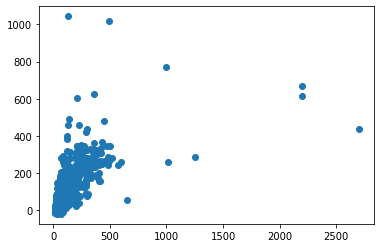

In [29]:
plt.scatter(y_test,predictions)

In the above scatter plot, we see data is in line shape, which means our model has done good predictions.

# Checking Accuracy

In [30]:
lm.score(X_test,y_test)

0.6752361295251037

In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.